In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, Binarizer
import numpy as np

In [2]:
#dev = pd.read_csv('new_data/clean-data.csv')
data = pd.read_csv('new_data/complete-data.csv')

In [3]:
input_cols = ['playoff', 'career_year']
#add all columns ending with _rolling
input_cols.extend([col for col in data.columns if col.endswith('_rolling')])

In [4]:
def corr_plot(corr):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

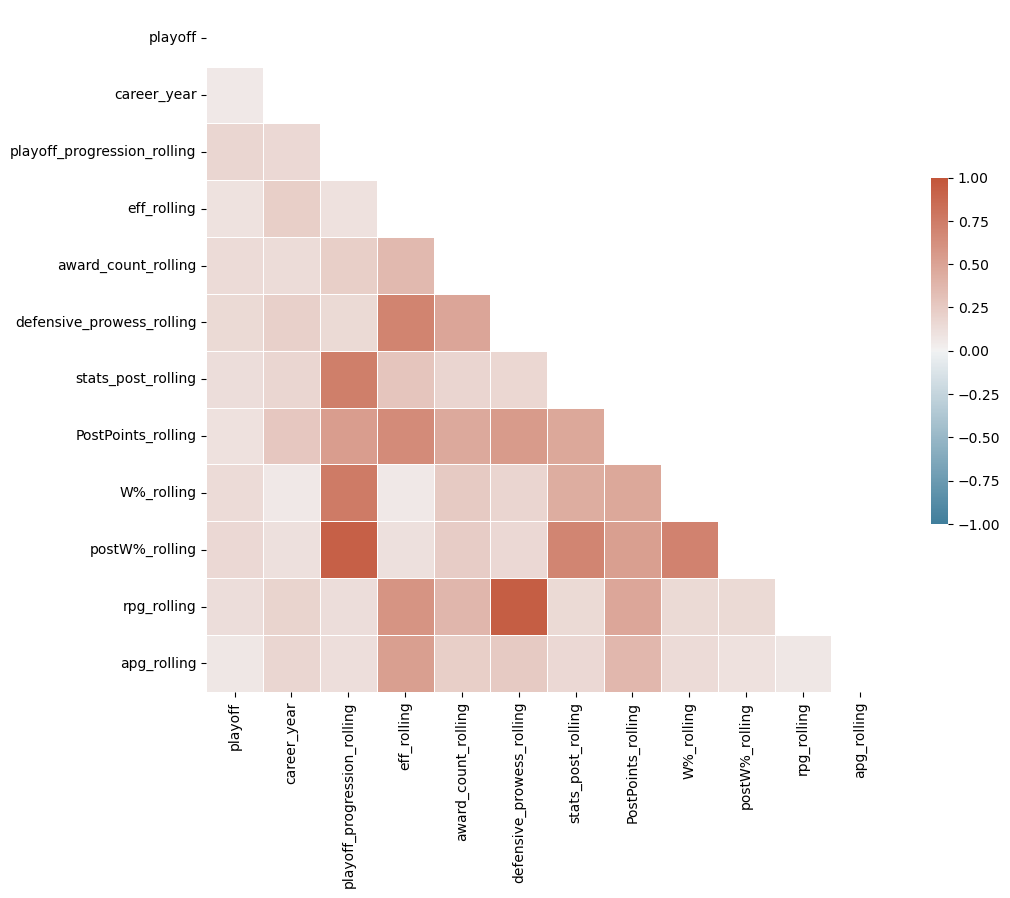

In [5]:
cor_matrix = data[input_cols].corr().abs()
corr_plot(cor_matrix)

In [6]:
val = cor_matrix['playoff'].sort_values(ascending=True)
sorted_columns = val.index.values
sorted_columns

array(['career_year', 'apg_rolling', 'eff_rolling', 'PostPoints_rolling',
       'rpg_rolling', 'stats_post_rolling', 'award_count_rolling',
       'W%_rolling', 'defensive_prowess_rolling', 'postW%_rolling',
       'playoff_progression_rolling', 'playoff'], dtype=object)

In [7]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,playoff,career_year,playoff_progression_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling,W%_rolling,postW%_rolling,rpg_rolling,apg_rolling
playoff,NaN,0.05707,0.174856,0.099257,0.142685,0.150019,0.132719,0.106023,0.143962,0.159589,0.130117,0.069854
career_year,NaN,NaN,0.162195,0.222667,0.140395,0.212574,0.174923,0.270733,0.057238,0.114953,0.189317,0.178280
playoff_progression_rolling,NaN,NaN,NaN,0.104866,0.225378,0.149900,0.734236,0.532054,0.753000,0.925345,0.127534,0.117327
eff_rolling,NaN,NaN,NaN,NaN,0.364471,0.702959,0.288523,0.649565,0.061812,0.113787,0.595945,0.526567
award_count_rolling,NaN,NaN,NaN,NaN,NaN,0.490220,0.184715,0.465928,0.254216,0.239800,0.376859,0.222136
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.171048,0.553195,0.180856,0.159375,0.943181,0.254990
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469548,0.440398,0.691533,0.151865,0.158456
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475807,0.526531,0.480530,0.371860
W%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709402,0.149833,0.146894
postW%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149023,0.101827


<AxesSubplot:xlabel='playoff_progression_rolling', ylabel='rpg_rolling'>

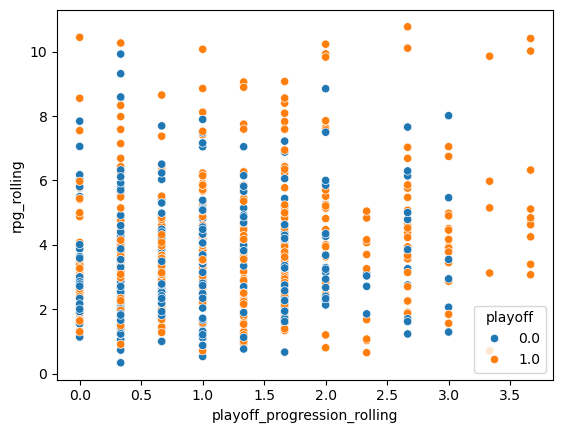

In [8]:
#plot histogram with playoff_rolling in x-axis and playoff_progression in y-axis, the dots should be colored by playoff
#only use the upper 50% of the scatter plot
sns.scatterplot(data=data, x='playoff_progression_rolling', y='rpg_rolling', hue='playoff')

In [9]:
#same table but for position is Guard (aka = 1)
guard_data = data[data['pos'] < 3]
guard_cor_matrix = guard_data[input_cols].corr().abs()

In [10]:
guard_val = guard_cor_matrix['playoff'].sort_values(ascending=True)
guard_sorted_columns = guard_val.index.values
guard_sorted_columns

array(['career_year', 'PostPoints_rolling', 'eff_rolling', 'rpg_rolling',
       'apg_rolling', 'W%_rolling', 'defensive_prowess_rolling',
       'stats_post_rolling', 'award_count_rolling', 'postW%_rolling',
       'playoff_progression_rolling', 'playoff'], dtype=object)

In [11]:
guard_upper_tri = guard_cor_matrix.where(np.triu(np.ones(guard_cor_matrix.shape),k=1).astype(bool))
guard_upper_tri

,playoff,career_year,playoff_progression_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling,W%_rolling,postW%_rolling,rpg_rolling,apg_rolling
playoff,NaN,0.064199,0.198912,0.093361,0.157863,0.144601,0.147357,0.076909,0.137137,0.162254,0.116379,0.126948
career_year,NaN,NaN,0.069493,0.198381,0.152770,0.172025,0.073693,0.268729,0.016641,0.044915,0.150373,0.163327
playoff_progression_rolling,NaN,NaN,NaN,0.050513,0.130308,0.084000,0.677690,0.477311,0.744705,0.916053,0.085889,0.120493
eff_rolling,NaN,NaN,NaN,NaN,0.257537,0.716912,0.258309,0.634477,0.001911,0.081201,0.637603,0.494248
award_count_rolling,NaN,NaN,NaN,NaN,NaN,0.371645,0.126123,0.302739,0.130847,0.143402,0.303956,0.209751
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.157875,0.506221,0.109077,0.126171,0.946942,0.340346
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423639,0.388537,0.657079,0.182752,0.134452
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418405,0.472584,0.463147,0.339872
W%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687778,0.096145,0.126748
postW%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142772,0.098047


In [12]:
center_data = data[data['pos']> 3]
center_cor_matrix = center_data[input_cols].corr().abs()

In [13]:
center_val = center_cor_matrix['playoff'].sort_values(ascending=True)
center_sorted_columns = center_val.index.values
center_sorted_columns

array(['apg_rolling', 'rpg_rolling', 'defensive_prowess_rolling',
       'award_count_rolling', 'eff_rolling', 'stats_post_rolling',
       'playoff_progression_rolling', 'PostPoints_rolling',
       'postW%_rolling', 'career_year', 'W%_rolling', 'playoff'],
      dtype=object)

In [14]:
center_upper_tri = center_cor_matrix.where(np.triu(np.ones(center_cor_matrix.shape),k=1).astype(bool))
center_upper_tri

,playoff,career_year,playoff_progression_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,stats_post_rolling,PostPoints_rolling,W%_rolling,postW%_rolling,rpg_rolling,apg_rolling
playoff,NaN,0.126444,0.106689,0.067558,0.060117,0.055853,0.084611,0.118697,0.164148,0.123791,0.035369,0.015046
career_year,NaN,NaN,0.237152,0.179814,0.200053,0.205529,0.245414,0.266978,0.138444,0.184920,0.187960,0.275097
playoff_progression_rolling,NaN,NaN,NaN,0.078709,0.207850,0.091669,0.826568,0.570408,0.771072,0.944290,0.057755,0.124144
eff_rolling,NaN,NaN,NaN,NaN,0.372283,0.628275,0.256792,0.603679,0.065870,0.110645,0.430081,0.677597
award_count_rolling,NaN,NaN,NaN,NaN,NaN,0.426758,0.163150,0.519747,0.278671,0.235213,0.258507,0.392101
defensive_prowess_rolling,NaN,NaN,NaN,NaN,NaN,NaN,0.076745,0.518168,0.179284,0.115629,0.919619,0.226300
stats_post_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499782,0.562105,0.767462,0.019476,0.222543
PostPoints_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529234,0.579069,0.388045,0.494430
W%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739096,0.146175,0.155764
postW%_rolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084285,0.121621
